In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def add_project_root(project_name: str = "extrema_lab"):
    cwd = os.getcwd()
    path_parts = cwd.split(os.sep)

    for i in range(len(path_parts), 0, -1):
        potential_root = os.sep.join(path_parts[:i])
        if os.path.basename(potential_root) == project_name:
            root = os.path.dirname(potential_root)
            if root not in sys.path:
                sys.path.append(root)
            print(f"已添加项目根目录到 sys.path: {root}")
            return

    print(f"未找到项目 {project_name}，请确认路径是否正确")


add_project_root("extrema_lab")
from extrema_lab.feature_eng.operator.utils_tools import *

已添加项目根目录到 sys.path: C:\quant\work


In [2]:
symbol = "BTCUSDT"
threshold = 0.0031
feat_cal_window = 600
feat_norm_window = 600
feat_norm_rolling_mean_window = 300

origin_df = process_single_symbol(
    symbol,
    str(threshold),
    feat_cal_window,
    feat_norm_window,
    feat_norm_rolling_mean_window,
)


In [3]:
origin_df

timestamp,px,sum_buy_sz,sum_sell_sz,ts_duration,px_pct,bs_imbalance,oi_sum_open_interest,oi_sum_open_interest_value,funding_funding_interval_hours,funding_last_funding_rate,premium_open,adjusted_funding_rate,funding_oi,premium_oi,funding_premium,factor_triplet,premium_funding_spread,oi_sum_open_interest_roll_mean_ratio_12,oi_sum_open_interest_pct_change_sum_12,oi_sum_open_interest_roll_mean_ratio_72,oi_sum_open_interest_pct_change_sum_72,oi_sum_open_interest_roll_mean_ratio_144,oi_sum_open_interest_pct_change_sum_144,oi_sum_open_interest_roll_mean_ratio_288,oi_sum_open_interest_pct_change_sum_288,premium_funding_spread_sum_288,adjusted_funding_rate_sum_288,premium_open_sum_288,funding_oi_roll_mean_ratio_288,premium_oi_roll_mean_ratio_288,factor_triplet_roll_mean_ratio_288,premium_oi_dev_144,z_oi_sum_open_interest,z_oi_sum_open_interest_value,z_funding_oi,z_premium_oi,…,z_oi_dn_divergence_zscaled,z_oi_up_divergence_long_term_zscaled,z_oi_dn_divergence_long_term_zscaled,z_oi_up_divergence_short_term_zscaled,z_oi_dn_divergence_short_term_zscaled,z_sum_sz_px_pct_rol_sum_600_zscaled,z_px_velo_rol_mean_600_zscaled,z_oi_px_diff_600_zscaled,oi_di_zscaled,oi_di_long_term_zscaled,oi_di_short_term_zscaled,taker_px_pct_diff_zscaled,factor_impact_momentum_zscaled,factor_impact_sensitivity_zscaled,factor_orderflow_sz_momentum_zscaled,factor_orderflow_sz_sensitivity_zscaled,z_oi_di_zscaled,z_oi_di_long_term_zscaled,z_taker_px_pct_diff_zscaled,z_factor_impact_momentum_zscaled,z_factor_impact_sensitivity_zscaled,z_factor_orderflow_sz_momentum_zscaled,z_factor_orderflow_sz_sensitivity_zscaled,factor_order_momentum_divergence_zscaled,factor_order_sentiment_divergence_zscaled,z_factor_order_momentum_divergence_zscaled,z_factor_order_sentiment_divergence_zscaled,px_risk_factor_zscaled,px_drawdown_zscaled,px_rebound_zscaled,z_px_risk_factor_zscaled,z_px_drawdown_zscaled,z_px_rebound_zscaled,px_dd_rb_zscaled,micro_trend_factor_600_zscaled,z_px_dd_rb_zscaled,z_micro_trend_factor_600_zscaled
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1719794346863000,62765.4,1469.862,989.364,1.6274e9,0.0031,480.498,1.7789225e7,28379.754893,8.0,0.0001,-0.000452,0.0000125,222.365313,-8035.037148,-5.6460e-9,-0.100438,-0.000464,1.001275,0.002746,1.015133,0.049173,1.031447,0.044366,1.038875,0.048148,-0.133684,0.0036,-0.130084,1.038875,1.038875,1.038875,0.031447,2.589929,2.142257,2.589929,-2.589929,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1719795609089000,62960.0,1252.314,1049.962,1.2622e9,0.0031,202.352,1.7807281e7,28351.576512,8.0,0.0001,-0.000452,0.0000125,222.591013,-8043.192682,-5.6460e-9,-0.10054,-0.000464,1.001156,0.00226,1.01277,0.048414,1.030853,0.046014,1.039045,0.049359,-0.133684,0.0036,-0.130084,1.039045,1.039045,1.039045,0.030853,2.473075,1.926233,2.473075,-2.473075,…,-0.30443,0.0,-0.30443,0.0,-0.30443,0.30443,0.30443,0.30443,-0.30443,0.266215,0.080471,0.30443,0.30443,0.30443,0.30443,0.30443,-0.30443,-0.30443,0.30443,0.30443,0.30443,0.30443,0.30443,-0.30443,-0.30443,-0.30443,-0.30443,0.30443,0.0,0.30443,0.30443,0.0,0.30443,0.30443,0.0,0.30443,0.0
1719795974168000,63155.6,1241.123,585.889,3.65079e8,0.003107,655.234,1.7807919e7,28311.282941,8.0,0.0001,-0.000452,0.0000125,222.598988,-8043.480854,-5.6460e-9,-0.100544,-0.000464,1.001013,0.002143,1.012309,0.035638,1.030558,0.046243,1.038904,0.049014,-0.133684,0.0036,-0.130084,1.038904,1.038904,1.038904,0.030558,2.440611,1.756726,2.440611,-2.440611,…,-0.442838,0.0,-0.442837,0.0,-0.442887,0.437797,0.433712,-0.066313,-0.442838,0.322931,0.091153,0.472709,0.433538,0.44588,0.327896,0.385808,-0.448174,-0.442837,0.472825,0.367635,0.432508,0.304605,0.343355,-0.304575,-

In [4]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.mixture import GaussianMixture
from sklearn.utils.class_weight import compute_sample_weight

import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.pretraining import TabNetPretrainer
from sklearn.preprocessing import LabelEncoder
import torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_last_n_rows_with_px_regression(
    y_true,           # 真实未来收益率
    y_pred,           # 模型预测收益率
    px,               # 价格
    std_array=None,   # 可选标准差
    n=700,
    m=-1,
    alpha=1.0
):
    # 截取最近 n 行
    y_true_slice = y_true[n:m]
    y_pred_slice = y_pred[n:m]
    px_slice = px[n:m]
    std_slice = std_array[n:m] if std_array is not None else None

    time_index = np.arange(len(y_true_slice))

    fig, ax1 = plt.subplots(figsize=(16, 7))

    # 价格线
    ax1.plot(time_index, px_slice, color='tab:gray', label='Price (px)', linewidth=1.5)
    if std_slice is not None:
        ax1.plot(time_index, px_slice + alpha * std_slice, linestyle=':', color='gray', alpha=0.4, label='+std')
        ax1.plot(time_index, px_slice - alpha * std_slice, linestyle=':', color='gray', alpha=0.4, label='-std')

    ax1.set_ylabel("Price")
    ax1.set_xlabel("Time Index")
    ax1.tick_params(axis='y', labelcolor='black')

    # 创建第二个 y 轴：收益率
    ax2 = ax1.twinx()
    ax2.plot(time_index, y_true_slice, label='True Future Return', color='tab:blue', linewidth=1.5)
    ax2.plot(time_index, y_pred_slice, label='Predicted Return', color='tab:green', linestyle='--', linewidth=1.5)
    ax2.set_ylabel("Return")
    ax2.tick_params(axis='y', labelcolor='black')

    # 图例
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.title(f"Price, True Return, and Predicted Return (Last {n} rows)")
    plt.tight_layout()
    plt.show()


In [6]:
import polars as pl
import numpy as np
from tqdm import tqdm

future_window = 150 # 改成预测未来150步的收益率

# 假设你已经有了 origin_df
px_np = origin_df["px"].to_numpy()

def future_return(px: np.ndarray, window: int, use_log_return: bool = False) -> np.ndarray:
    n = len(px)
    returns = np.full(n, np.nan)

    for i in tqdm(range(n - window), desc="Calculating future returns"):
        if use_log_return:
            returns[i] = np.log(px[i + window] / px[i]) if px[i] > 0 else np.nan
        else:
            returns[i] = (px[i + window] - px[i]) / px[i] if px[i] > 0 else np.nan

    return returns

# 计算未来收益率标签
future_return_label = future_return(px_np, future_window, use_log_return=True)

# 加入 DataFrame
a_df = origin_df.with_columns([
    pl.Series("future_return", future_return_label)
])

# 去除 NaN
a_df_filtered = a_df.filter(pl.col("future_return").is_not_null())
a_df_filtered = clean_df_drop_nulls(a_df_filtered)

# 可选：按周分割
split_dataframes = split_df_by_month(a_df_filtered)
print("num split dfs: ", len(split_dataframes))


Calculating future returns: 100%|██████████████████████████████████████████████████████████████████████| 27422/27422 [00:00<00:00, 1305103.99it/s]


converted
各列空值数量：
future_return    150
dtype: int64
删除空值超过 500000 的列：[]
删除列后，DataFrame形状：(27572, 262)
删除空值行后，DataFrame形状：(27422, 262)
num split dfs:  13


In [7]:
import os
import json
import pickle
from pathlib import Path
from datetime import datetime

def save_tabnet_checkpoint(
    model,
    symbol,
    base_save_dir: str,
    model_params: dict,
    feature_names: list[str],
    training_meta: dict,
    unique_id: str = None, 
):
    if unique_id is None:
        timestamp = str(datetime.now().strftime("%Y-%m-%d_%H-%M"))
        save_dir = os.path.join(base_save_dir, f"{symbol}_{timestamp}")
    else:
        save_dir = os.path.join(base_save_dir, f"{symbol}_{unique_id}")

    os.makedirs(save_dir, exist_ok=True)

    model_path = os.path.join(save_dir, "tabnet_model")
    model.save_model(model_path)

    config_path = os.path.join(save_dir, "model_metadata.json")
    with open(config_path, "w") as f:
        json.dump({
            "model_params": model_params,
            "meta_info": training_meta,
        }, f, indent=4)

    aux_path = os.path.join(save_dir, "auxiliary.pkl")
    with open(aux_path, "wb") as f:
        pickle.dump({
            "feature_names": feature_names,
        }, f)

    print(f"model and meta info saved to {save_dir}")


In [8]:
n_train_terms = 6 # 可配置
n_val_terms = 1    # 一般 1 周验证
n_test_terms = 1   # 后 1 周做 test

exclude_prefixes = ['timestamp', 'timestamp_dt', 'symbol']
target_col = "future_return"
feature_cols = [
    col for col in origin_df.columns
    if (col.endswith("_zscaled") and col.startswith("z_"))
        and all(not col.startswith(prefix) for prefix in exclude_prefixes)
        and not col.startswith("future_return_")
        and col != "px"
]
# print(feature_cols)
print(len(feature_cols))
# feature_cols = ["oi_di_long_term"]
results = []
all_tab_inc_test_predictions = []
all_tabnet_test_predictions = []
all_lgb_test_predictions = []

lgb_model = None
tab_inc = None
tab_inc_flag = 0

overall_start = None
overall_end = None


for i in range(len(split_dataframes) - n_train_terms - n_val_terms + 1):
    train_dfs = split_dataframes[i : i + n_train_terms]
    val_dfs = split_dataframes[i + n_train_terms : i + n_train_terms + n_val_terms]
    
    train_df = pl.concat(train_dfs)
    val_df = pl.concat(val_dfs)

    print("=" * 60)
    print(f"Fold {i}: Train {i}~{i+n_train_terms-1}, Val {i+n_train_terms}")
    print("Train:", train_df['timestamp_dt'][0], "to", train_df['timestamp_dt'][-1])
    print("Val:", val_df['timestamp_dt'][0], "to", val_df['timestamp_dt'][-1])

    fold_start = train_df['timestamp_dt'][0]
    fold_end = val_df['timestamp_dt'][-1]

    # 更新 overall_start 和 overall_end
    if overall_start is None or fold_start < overall_start:
        overall_start = fold_start
    if overall_end is None or fold_end > overall_end:
        overall_end = fold_end
        
    # 处理 train
    train_df_processed = train_df.sort('timestamp').drop_nulls(subset=feature_cols + [target_col, 'px']).to_pandas()
    X_train = train_df_processed[feature_cols]
    y_train = train_df_processed[target_col]
    px_train = train_df_processed['px']
    
    # 处理 val
    val_df_processed = val_df.sort('timestamp').drop_nulls(subset=feature_cols + [target_col, 'px']).to_pandas()
    X_val = val_df_processed[feature_cols]
    y_val = val_df_processed[target_col]
    px_val = val_df_processed['px']
    timestamps_val = val_df_processed['timestamp'] # 收集时间戳

    # modellllllll
    up_thresh = 0.2
    lower_thresh = 0.8

    # sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # # # #LGBM
    # lgb_model = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.001, max_depth=4, verbose=-1)
    # early_stopping_callback = lgb.early_stopping(
    #     stopping_rounds=500,  # 耐心值：如果验证集性能在连续100轮内没有提升，就停止训练
    #     verbose=True,          # 打印早停信息，例如在第多少轮停止，最佳分数是多少
    # )
    # lgb_model.fit(
    #     X_train, y_train,
    #     sample_weight=sample_weights,  # ✅ 添加 sample_weight
    #     eval_set=[(X_val, y_val)],
    #     eval_metric='acc',
    #     # callbacks=[early_stopping_callback], # 将早停回调传入 callbacks 参数
    # )
    
    # lgb_eval = evaluate_with_confidence(
    #     y_true=y_val,
    #     y_pred_proba=lgb_model.predict_proba(X_val)[:, 1],
    #     model_name="lgb_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # # plot_last_n_rows_with_px(y_val, y_val, lgb_model.predict_proba(X_val)[:, 1], px_val, std_array=std_val, n=1, m=-1, alpha=alpha)
    
    # lgb_eval = evaluate_with_confidence(
    #     y_true=y_test,
    #     y_pred_proba=lgb_model.predict_proba(X_test)[:, 1],
    #     model_name="lgb_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(lgb_model.predict_proba(X_test)[:, 1], y_test, lgb_model.predict_proba(X_test)[:, 1], px_test, std_array=std_test, n=1, m=-1, alpha=alpha)
    # lgb_test_pred_probs = lgb_model.predict_proba(X_test)[:, 1]

    # current_window_results = pd.DataFrame({
    #     'timestamp': timestamps_test,
    #     'symbol': "BTCUSDT", # 如果有多个股票，收集 symbol 是必要的
    #     'true_label': y_test,
    #     'predicted_prob': lgb_test_pred_probs,
    #     'px': px_test, # 收集价格，回测时需要
    #     'rolling_std': std_test # 收集波动率，可能用于策略或分析
    #     # 添加任何你回测需要的其他数据
    # })
    # all_lgb_test_predictions.append(current_window_results)

    # # CAT
    # cat_model = CatBoostClassifier(iterations=2000, learning_rate=0.005, depth=9, verbose=0)
    # cat_model.fit(
    #     X_train, y_train_bin,
    # )

    # cat_eval = evaluate_with_confidence(
    #     y_true=y_val_bin,
    #     y_pred_proba=cat_model.predict_proba(X_val)[:, 1],
    #     model_name="cat_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(y_val, y_val_bin, cat_model.predict_proba(X_val)[:, 1], px_val, n=6199)
    
    # cat_eval = evaluate_with_confidence(
    #     y_true=y_test_bin,
    #     y_pred_proba=cat_model.predict_proba(X_test)[:, 1],
    #     model_name="cat_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(y_test, y_test_bin, cat_model.predict_proba(X_test)[:, 1], px_test, n=6199)

    # # XGB
    # xgb_model = xgb.XGBClassifier(n_estimators=2000, learning_rate=0.005, max_depth=9, verbosity=0, use_label_encoder=False)
    # xgb_model.fit(
    #     X_train, y_train,
    # )

    # xgb_eval = evaluate_with_confidence(
    #     y_true=y_val,
    #     y_pred_proba=xgb_model.predict_proba(X_val)[:, 1],
    #     model_name="xgb_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(y_val, y_val, xgb_model.predict_proba(X_val)[:, 1], px_val, std_array=std_val, n=1, m=-1, alpha=alpha)
    

    # xgb_eval = evaluate_with_confidence(
    #     y_true=y_test,
    #     y_pred_proba=xgb_model.predict_proba(X_test)[:, 1],
    #     model_name="xgb_model",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # plot_last_n_rows_with_px(y_test, y_test, xgb_model.predict_proba(X_test)[:, 1], px_test, std_array=std_test, n=1, m=-1, alpha=alpha)

    params = {
        # 模型结构参数
        "n_d": 32,                      # 决策输出维度
        "n_a": 32,                      # 注意力机制维度
        "n_steps": 3,                  # 决策步数
        "gamma": 1.3,                  # 控制特征复用的程度（>1）
        "n_independent": 3,           # 每个 step 的独立 Feature Transformer 层数
        "n_shared":2,                # 每个 step 的共享 Feature Transformer 层数
    
        # 分类特征嵌入（如果你用的都是 float 特征，可以全留空）
        "cat_idxs": [],               # 类别特征的列索引
        "cat_dims": [],               # 每个类别特征的类别数
        "cat_emb_dim": 1,             # 类别特征的嵌入维度（或 list）
    
        # 正则化与数值稳定性
        "lambda_sparse": 1e-5,        # 稀疏正则
        "epsilon": 1e-15,             # sparsemax 稳定项
        "momentum": 0.03,             # BatchNorm 的动量
        "clip_value": 3.0,            # 梯度裁剪
        
        # 注意力 mask 类型
        "mask_type": "entmax",     # sparsemax 或 entmax
    
        # 优化器设置（函数和参数）
        # "optimizer_fn": torch.optim.Adam,    
        "optimizer_params": {"lr": 1e-2},
    
        # 学习率调度器（可选）
        "scheduler_fn": None,         # torch.optim.lr_scheduler.StepLR 等
        "scheduler_params": {},       # 比如 {"step_size": 20, "gamma": 0.95}
    
        # 预训练解码器结构（一般用不到）
        "n_shared_decoder": 1,
        "n_indep_decoder": 1,
    
        # 训练环境和调试
        "seed": 7,
        "verbose": 20,
        "device_name": "cuda",        # auto / cpu / cuda
    }

    init_fit_params = {
        "max_epochs": 600,
        "patience": 75,
        "batch_size": 2048,
        "virtual_batch_size": 512,
    }

    inc_fit_params = {
        "max_epochs": 50,
        "patience": 10,
        "batch_size": 1024,
        "virtual_batch_size": 256,
        "warm_start": True,
    }

    # # Label Encode y（如果是0/1就不用）
    # y_train_enc = y_train.astype(int)
    # y_val_enc = y_val.astype(int)
    
    # sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_enc)
    # print(sample_weights)
    
    # TabNet 训练
    
    # tabnet = TabNetClassifier(**params)
    # tabnet.fit(
    #     X_train=X_train.values, y_train=y_train_enc,
    #     eval_set=[(X_val.values, y_val_enc)],
    #     weights=sample_weights,
    #     **init_fit_params,
    # )

    # # proba_smooth = softmax_with_temperature(proba_raw, temperature=1.5)
    
    # tabnet_eval = evaluate_with_confidence(
    #     y_true=y_val,
    #     y_pred_proba=tabnet.predict_proba(X_val.values)[:, 1],
    #     model_name="tabnet",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )
    # # plot_last_n_rows_with_px(y_val, y_val, tabnet.predict_proba(X_val.values)[:, 1], px_val, std_array=std_val, n=1, m=-1, alpha=alpha)


    # tabnet_eval = evaluate_with_confidence(
    #     y_true=y_test,
    #     y_pred_proba=tabnet.predict_proba(X_test.values)[:, 1],
    #     model_name="tabnet",
    #     lower_thresh=up_thresh,
    #     upper_thresh=lower_thresh,
    #     print_report=True,
    # )

    # plot_last_n_rows_with_px(y_test, y_test, tabnet.predict_proba(X_test.values)[:, 1], px_test, std_array=std_test, n=1, m=-1, alpha=alpha)

    # current_window_results = pd.DataFrame({
    #     'timestamp': timestamps_test,
    #     'symbol': "TST", # 如果有多个股票，收集 symbol 是必要的
    #     'true_label': y_test,
    #     'predicted_prob': tabnet.predict_proba(X_test.values)[:, 1],
    #     'px': px_test, # 收集价格，回测时需要
    #     'rolling_std': std_test # 收集波动率，可能用于策略或分析
    #     # 添加任何你回测需要的其他数据
    # })
    # all_tabnet_test_predictions.append(current_window_results)

    # TabNet_incremental 训练
    tabnet = TabNetRegressor(**params)
    tabnet.fit(
        X_train=X_train.values, 
        y_train=y_train.values.reshape(-1, 1),
        **init_fit_params,
    )

    y_val_pred = tabnet.predict(X_val.values)
    print("回归评估 (Val):")
    print("MSE:", mean_squared_error(y_val, y_val_pred))
    print("MAE:", mean_absolute_error(y_val, y_val_pred))
    print("R²:", r2_score(y_val, y_val_pred))

    ic, _ = spearmanr(y_val, y_val_pred)
    print("IC (val):", ic)
    # 可选：定义置信区间（过滤极端预测）
    conf_thresh = 0.005  # 例如：只看预测收益率 > 0.5% 或 < -0.5%
    mask = (np.abs(y_val_pred) >= conf_thresh)
    print("过滤高置信度样本数量: ", mask.sum())
    
    # 收集预测结果（Val 可选，Test 常用于回测）
    current_window_results = pd.DataFrame({
        'timestamp': timestamps_val,  # 注意：用 test 数据
        'symbol': symbol,
        'true_label': y_val,
        'predicted_value': y_val_pred.ravel(),  # 保证是一维
        'px': px_val,
    })
    
    all_tab_inc_test_predictions.append(current_window_results)

    week_results = {
        'train_period': f"{train_df['timestamp_dt'][0]} to {train_df['timestamp_dt'][-1]}",
        'val_period': f"{val_df['timestamp_dt'][0]} to {val_df['timestamp_dt'][-1]}",
        # 'LGBM': lgb_eval,
        # 'CatBoost': cat_model,
        # 'XGBoost': xgb_eval,
        # 'TabNet': tabnet_eval,
    }
    
    results.append(week_results)
    print(f"Test Week {i+n_train_terms} Evaluation Completed")
 
# 存储该周评估信息
term_results = {
    'train_period': f"{train_df['timestamp_dt'][0]} to {train_df['timestamp_dt'][-1]}",
    'val_period': f"{val_df['timestamp_dt'][0]} to {val_df['timestamp_dt'][-1]}",
    'TabNet_MSE': mean_squared_error(y_val, y_val_pred),
    'TabNet_MAE': mean_absolute_error(y_val, y_val_pred),
    'TabNet_R2': r2_score(y_val, y_val_pred),
    'HighConfidenceCount': int(mask.sum())
}
results.append(term_results)

print(f"Test Week {i + n_train_terms} Evaluation Completed")

# 合并所有窗口的预测结果
final_predictions_df = pd.concat(all_tab_inc_test_predictions).sort_values('timestamp').reset_index(drop=True)

print("\n--- Final Predictions DataFrame for Backtesting ---")
print(final_predictions_df.head())
print(f"Total rows collected: {len(final_predictions_df)}")

# 字符串化整体时间范围
overall_start = str(overall_start)
overall_end = str(overall_end)
print(f"整体训练时间范围：{overall_start} 到 {overall_end}")

57
Fold 0: Train 0~5, Val 6
Train: 2024-07-01 00:39:06.863000 to 2024-12-31 22:21:59.887000
Val: 2025-01-01 00:20:58.659000 to 2025-01-31 22:52:45.838000


C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.11177 |  0:00:00s
epoch 20 | loss: 0.00385 |  0:00:06s
epoch 40 | loss: 0.00196 |  0:00:11s
epoch 60 | loss: 0.00155 |  0:00:16s
epoch 80 | loss: 0.00134 |  0:00:22s
epoch 100| loss: 0.00111 |  0:00:27s
epoch 120| loss: 0.0008  |  0:00:31s
epoch 140| loss: 0.00099 |  0:00:37s
epoch 160| loss: 0.00062 |  0:00:42s
epoch 180| loss: 0.00051 |  0:00:47s
epoch 200| loss: 0.00046 |  0:00:52s
epoch 220| loss: 0.00042 |  0:00:57s
epoch 240| loss: 0.0004  |  0:01:02s
epoch 260| loss: 0.00056 |  0:01:07s
epoch 280| loss: 0.00039 |  0:01:13s
epoch 300| loss: 0.00035 |  0:01:18s
epoch 320| loss: 0.00051 |  0:01:23s
epoch 340| loss: 0.00032 |  0:01:28s
epoch 360| loss: 0.00026 |  0:01:33s
epoch 380| loss: 0.00033 |  0:01:38s
epoch 400| loss: 0.00027 |  0:01:44s
epoch 420| loss: 0.00024 |  0:01:49s
epoch 440| loss: 0.00035 |  0:01:54s
epoch 460| loss: 0.00028 |  0:01:59s
epoch 480| loss: 0.0002  |  0:02:04s
epoch 500| loss: 0.00019 |  0:02:09s
epoch 520| loss: 0.00022 |  0:02:14s
e

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.16411 |  0:00:00s
epoch 20 | loss: 0.0039  |  0:00:05s
epoch 40 | loss: 0.00212 |  0:00:10s
epoch 60 | loss: 0.00112 |  0:00:15s
epoch 80 | loss: 0.00108 |  0:00:21s
epoch 100| loss: 0.00091 |  0:00:26s
epoch 120| loss: 0.00057 |  0:00:31s
epoch 140| loss: 0.00071 |  0:00:36s
epoch 160| loss: 0.00052 |  0:00:42s
epoch 180| loss: 0.00061 |  0:00:47s
epoch 200| loss: 0.00055 |  0:00:53s
epoch 220| loss: 0.00043 |  0:00:58s
epoch 240| loss: 0.00035 |  0:01:03s
epoch 260| loss: 0.00036 |  0:01:08s
epoch 280| loss: 0.00047 |  0:01:14s
epoch 300| loss: 0.00031 |  0:01:19s
epoch 320| loss: 0.00037 |  0:01:24s
epoch 340| loss: 0.00022 |  0:01:29s
epoch 360| loss: 0.00022 |  0:01:34s
epoch 380| loss: 0.00034 |  0:01:39s
epoch 400| loss: 0.00021 |  0:01:45s
epoch 420| loss: 0.00019 |  0:01:50s
epoch 440| loss: 0.00023 |  0:01:55s
epoch 460| loss: 0.00023 |  0:02:01s
epoch 480| loss: 0.00018 |  0:02:07s
epoch 500| loss: 0.00018 |  0:02:12s
epoch 520| loss: 0.00018 |  0:02:17s
e

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.20736 |  0:00:00s
epoch 20 | loss: 0.00328 |  0:00:04s
epoch 40 | loss: 0.00207 |  0:00:09s
epoch 60 | loss: 0.00118 |  0:00:13s
epoch 80 | loss: 0.0014  |  0:00:18s
epoch 100| loss: 0.00114 |  0:00:23s
epoch 120| loss: 0.00081 |  0:00:28s
epoch 140| loss: 0.0005  |  0:00:33s
epoch 160| loss: 0.0008  |  0:00:37s
epoch 180| loss: 0.00071 |  0:00:42s
epoch 200| loss: 0.00056 |  0:00:46s
epoch 220| loss: 0.00046 |  0:00:51s
epoch 240| loss: 0.00037 |  0:00:55s
epoch 260| loss: 0.00043 |  0:00:59s
epoch 280| loss: 0.00045 |  0:01:04s
epoch 300| loss: 0.00029 |  0:01:08s
epoch 320| loss: 0.00036 |  0:01:13s
epoch 340| loss: 0.00027 |  0:01:17s
epoch 360| loss: 0.00031 |  0:01:22s
epoch 380| loss: 0.00027 |  0:01:26s
epoch 400| loss: 0.00024 |  0:01:31s
epoch 420| loss: 0.00033 |  0:01:35s
epoch 440| loss: 0.00021 |  0:01:40s
epoch 460| loss: 0.00021 |  0:01:44s
epoch 480| loss: 0.00027 |  0:01:49s
epoch 500| loss: 0.00023 |  0:01:53s
epoch 520| loss: 0.00021 |  0:01:58s
e

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.99369 |  0:00:00s
epoch 20 | loss: 0.0036  |  0:00:05s
epoch 40 | loss: 0.00192 |  0:00:11s
epoch 60 | loss: 0.00117 |  0:00:16s
epoch 80 | loss: 0.00086 |  0:00:22s
epoch 100| loss: 0.0007  |  0:00:27s
epoch 120| loss: 0.00069 |  0:00:32s
epoch 140| loss: 0.00053 |  0:00:37s
epoch 160| loss: 0.00041 |  0:00:43s
epoch 180| loss: 0.00042 |  0:00:48s
epoch 200| loss: 0.00037 |  0:00:53s
epoch 220| loss: 0.00038 |  0:00:58s
epoch 240| loss: 0.0003  |  0:01:04s
epoch 260| loss: 0.0003  |  0:01:09s
epoch 280| loss: 0.00024 |  0:01:15s
epoch 300| loss: 0.00026 |  0:01:20s
epoch 320| loss: 0.00024 |  0:01:26s
epoch 340| loss: 0.00023 |  0:01:31s
epoch 360| loss: 0.00021 |  0:01:37s
epoch 380| loss: 0.00021 |  0:01:42s
epoch 400| loss: 0.00019 |  0:01:48s
epoch 420| loss: 0.00018 |  0:01:53s
epoch 440| loss: 0.00021 |  0:01:59s
epoch 460| loss: 0.00016 |  0:02:04s
epoch 480| loss: 0.00018 |  0:02:10s
epoch 500| loss: 0.00018 |  0:02:16s
epoch 520| loss: 0.00015 |  0:02:22s
e

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.09533 |  0:00:00s
epoch 20 | loss: 0.00323 |  0:00:05s
epoch 40 | loss: 0.00193 |  0:00:10s
epoch 60 | loss: 0.00111 |  0:00:16s
epoch 80 | loss: 0.00085 |  0:00:21s
epoch 100| loss: 0.00086 |  0:00:26s
epoch 120| loss: 0.00064 |  0:00:31s
epoch 140| loss: 0.00074 |  0:00:36s
epoch 160| loss: 0.00053 |  0:00:42s
epoch 180| loss: 0.00052 |  0:00:47s
epoch 200| loss: 0.00049 |  0:00:52s
epoch 220| loss: 0.00037 |  0:00:58s
epoch 240| loss: 0.00033 |  0:01:03s
epoch 260| loss: 0.00036 |  0:01:08s
epoch 280| loss: 0.00025 |  0:01:14s
epoch 300| loss: 0.00025 |  0:01:19s
epoch 320| loss: 0.00029 |  0:01:24s
epoch 340| loss: 0.00024 |  0:01:31s
epoch 360| loss: 0.0003  |  0:01:36s
epoch 380| loss: 0.00026 |  0:01:41s
epoch 400| loss: 0.00022 |  0:01:46s
epoch 420| loss: 0.00019 |  0:01:52s
epoch 440| loss: 0.00018 |  0:01:57s
epoch 460| loss: 0.00018 |  0:02:03s
epoch 480| loss: 0.00019 |  0:02:08s
epoch 500| loss: 0.00017 |  0:02:14s
epoch 520| loss: 0.00018 |  0:02:19s
e

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.20379 |  0:00:00s
epoch 20 | loss: 0.00371 |  0:00:04s
epoch 40 | loss: 0.00197 |  0:00:08s
epoch 60 | loss: 0.00147 |  0:00:13s
epoch 80 | loss: 0.00127 |  0:00:17s
epoch 100| loss: 0.00089 |  0:00:22s
epoch 120| loss: 0.00082 |  0:00:27s
epoch 140| loss: 0.00094 |  0:00:32s
epoch 160| loss: 0.00062 |  0:00:36s
epoch 180| loss: 0.00053 |  0:00:40s
epoch 200| loss: 0.00048 |  0:00:45s
epoch 220| loss: 0.00082 |  0:00:50s
epoch 240| loss: 0.00035 |  0:00:55s
epoch 260| loss: 0.00034 |  0:00:59s
epoch 280| loss: 0.00032 |  0:01:04s
epoch 300| loss: 0.00038 |  0:01:09s
epoch 320| loss: 0.00032 |  0:01:14s
epoch 340| loss: 0.00033 |  0:01:19s
epoch 360| loss: 0.00025 |  0:01:24s
epoch 380| loss: 0.00029 |  0:01:29s
epoch 400| loss: 0.00023 |  0:01:33s
epoch 420| loss: 0.00026 |  0:01:38s
epoch 440| loss: 0.00021 |  0:01:42s
epoch 460| loss: 0.00021 |  0:01:47s
epoch 480| loss: 0.00021 |  0:01:52s
epoch 500| loss: 0.0002  |  0:01:56s
epoch 520| loss: 0.00019 |  0:02:01s
e

C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\Grayman\anaconda3\envs\EI_Lab\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.1816  |  0:00:00s
epoch 20 | loss: 0.00366 |  0:00:04s
epoch 40 | loss: 0.00222 |  0:00:09s
epoch 60 | loss: 0.00162 |  0:00:14s
epoch 80 | loss: 0.00132 |  0:00:19s
epoch 100| loss: 0.00089 |  0:00:23s
epoch 120| loss: 0.00084 |  0:00:28s
epoch 140| loss: 0.00076 |  0:00:32s
epoch 160| loss: 0.00057 |  0:00:37s
epoch 180| loss: 0.00056 |  0:00:41s
epoch 200| loss: 0.00054 |  0:00:46s
epoch 220| loss: 0.00053 |  0:00:50s
epoch 240| loss: 0.00037 |  0:00:54s
epoch 260| loss: 0.00034 |  0:00:59s
epoch 280| loss: 0.00035 |  0:01:04s
epoch 300| loss: 0.00032 |  0:01:09s
epoch 320| loss: 0.00032 |  0:01:13s
epoch 340| loss: 0.00031 |  0:01:17s
epoch 360| loss: 0.00025 |  0:01:22s
epoch 380| loss: 0.00025 |  0:01:26s
epoch 400| loss: 0.00032 |  0:01:31s
epoch 420| loss: 0.0003  |  0:01:36s
epoch 440| loss: 0.00023 |  0:01:40s
epoch 460| loss: 0.00025 |  0:01:44s
epoch 480| loss: 0.00024 |  0:01:49s
epoch 500| loss: 0.0002  |  0:01:54s
epoch 520| loss: 0.00019 |  0:01:58s
e

In [9]:
print(len(X_val.columns))

57


In [10]:
explain_matrix, masks = tabnet.explain(X_val.values)


Top 20 Features by Importance:

z_px_rebound_zscaled                     Importance: 0.339751
z_px_dd_rb_zscaled                       Importance: 0.228282
z_px_pct_rol_sum_160_zscaled             Importance: 0.153326
z_oi_px_diff_600_zscaled                 Importance: 0.153216
z_factor_triplet_zscaled                 Importance: 0.140421
z_oi_sum_open_interest_zscaled           Importance: 0.123621
z_factor_order_sentiment_divergence_zscaled Importance: 0.115397
z_oi_sum_open_interest_value_zscaled     Importance: 0.089528
z_sum_sz_px_pct_rol_sum_600_zscaled      Importance: 0.087855
z_bs_imba_rol_mean_600_zscaled           Importance: 0.086884
z_factor_order_momentum_divergence_zscaled Importance: 0.083602
z_oi_di_zscaled                          Importance: 0.077954
z_premium_open_sum_288_zscaled           Importance: 0.074986
z_oi_up_divergence_zscaled               Importance: 0.074791
z_oi_dn_divergence_zscaled               Importance: 0.071860
z_log1p_sum_sz_600_rsi_600_zscale

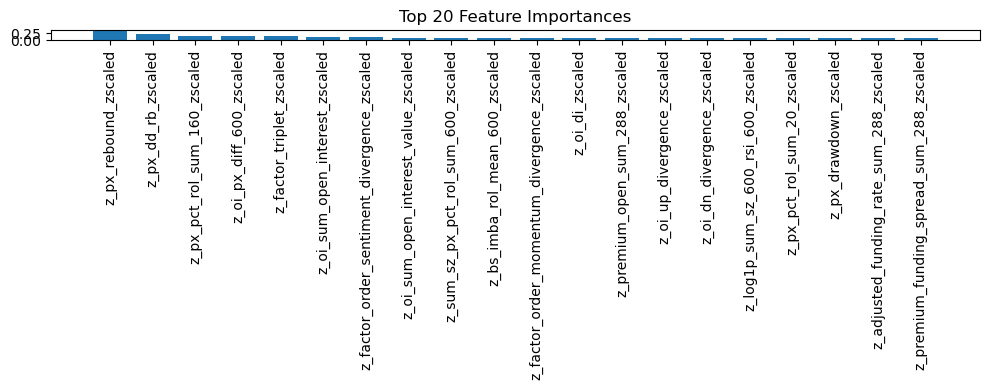

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 explain_matrix 是 TabNetClassifier 的解释矩阵 (n_samples, n_features)
mean_importance = np.mean(np.abs(explain_matrix), axis=0)
top_n = 20
top_indices = np.argsort(mean_importance)[::-1][:top_n]

# 特征名
top_feature_names = [X_train.columns[i] for i in top_indices]
top_importance_values = mean_importance[top_indices]

# 打印 Top N 特征名 + 权重
print(f"Top {top_n} Features by Importance:\n")
for name, score in zip(top_feature_names, top_importance_values):
    print(f"{name:<40} Importance: {score:.6f}")

# 画图
plt.figure(figsize=(10, 4))
plt.bar(range(top_n), top_importance_values)
plt.xticks(range(top_n), top_feature_names, rotation=90)
plt.title(f"Top {top_n} Feature Importances")
plt.tight_layout()
plt.show()


In [12]:
import numpy as np

mask_sample = masks[0][0]  # 第0步，第0个样本的mask
nonzero_indices = np.nonzero(mask_sample)[0]  # 找非零位置索引

print("被关注的特征索引:", nonzero_indices)
print("对应的权重:", mask_sample[nonzero_indices])

# 假设你的特征名列表是 feature_names（长度460）
for idx in nonzero_indices:
    print(f"特征: {X_train.columns[idx]}, 权重: {mask_sample[idx]:.4f}")


被关注的特征索引: [ 1  4  6 13 16 20 21 26 27 34 36 41 43 45 48 50 52 54]
对应的权重: [9.35603902e-02 4.90341743e-04 7.33273625e-02 1.03540733e-01
 2.90333349e-02 6.52249306e-02 1.59908161e-01 1.66194455e-03
 4.25546756e-03 5.06357923e-02 1.86008590e-04 1.28469327e-02
 1.31598348e-02 7.64301121e-02 7.11192470e-03 9.01526865e-03
 1.51569793e-05 2.99595803e-01]
特征: z_oi_sum_open_interest_value_zscaled, 权重: 0.0936
特征: z_factor_triplet_zscaled, 权重: 0.0005
特征: z_oi_sum_open_interest_pct_change_sum_12_zscaled, 权重: 0.0733
特征: z_premium_funding_spread_sum_288_zscaled, 权重: 0.1035
特征: z_funding_oi_roll_mean_ratio_288_zscaled, 权重: 0.0290
特征: z_px_pct_rol_sum_10_zscaled, 权重: 0.0652
特征: z_px_pct_rol_sum_20_zscaled, 权重: 0.1599
特征: z_bs_ratio_rol_mean_600_zscaled, 权重: 0.0017
特征: z_bs_imba_rol_mean_600_zscaled, 权重: 0.0043
特征: z_oi_up_divergence_zscaled, 权重: 0.0506
特征: z_oi_up_divergence_long_term_zscaled, 权重: 0.0002
特征: z_px_velo_rol_mean_600_zscaled, 权重: 0.0128
特征: z_oi_di_zscaled, 权重: 0.0132
特征: z_taker_px_pct_d

In [13]:
import numpy as np
import pandas as pd

def show_tabnet_attention_masks(masks, feature_names, sample_idx=0, top_k=10):
    """
    显示 TabNet 对某个样本在每一步中关注的特征及其权重。

    参数:
    - masks: tabnet.explain(X)[1] 返回的字典
    - feature_names: list[str]，对应 X_train.columns
    - sample_idx: 选哪个样本
    - top_k: 最多展示前多少个非零特征
    """
    for step, mask_array in masks.items():
        mask_sample = mask_array[sample_idx]  # shape = (num_features,)
        nonzero_indices = np.nonzero(mask_sample)[0]
        weights = mask_sample[nonzero_indices]
        
        # 按照权重从高到低排序
        sorted_idx = np.argsort(-weights)
        top_indices = nonzero_indices[sorted_idx[:top_k]]
        
        print(f"\n🧭 Step {step}（共{len(nonzero_indices)}个非零特征）:")
        for i in top_indices:
            print(f"  特征: {feature_names[i]:<30} 权重: {mask_sample[i]:.4f}")


In [14]:
# 假设你已经有
# masks = tabnet.explain(X_test)[1]
# feature_names = list(X_test.columns)

show_tabnet_attention_masks(masks, X_train.columns, sample_idx=0, top_k=20)



🧭 Step 0（共18个非零特征）:
  特征: z_px_rebound_zscaled           权重: 0.2996
  特征: z_px_pct_rol_sum_20_zscaled    权重: 0.1599
  特征: z_premium_funding_spread_sum_288_zscaled 权重: 0.1035
  特征: z_oi_sum_open_interest_value_zscaled 权重: 0.0936
  特征: z_taker_px_pct_diff_zscaled    权重: 0.0764
  特征: z_oi_sum_open_interest_pct_change_sum_12_zscaled 权重: 0.0733
  特征: z_px_pct_rol_sum_10_zscaled    权重: 0.0652
  特征: z_oi_up_divergence_zscaled     权重: 0.0506
  特征: z_funding_oi_roll_mean_ratio_288_zscaled 权重: 0.0290
  特征: z_oi_di_zscaled                权重: 0.0132
  特征: z_px_velo_rol_mean_600_zscaled 权重: 0.0128
  特征: z_factor_order_momentum_divergence_zscaled 权重: 0.0090
  特征: z_factor_orderflow_sz_momentum_zscaled 权重: 0.0071
  特征: z_bs_imba_rol_mean_600_zscaled 权重: 0.0043
  特征: z_bs_ratio_rol_mean_600_zscaled 权重: 0.0017
  特征: z_factor_triplet_zscaled       权重: 0.0005
  特征: z_oi_up_divergence_long_term_zscaled 权重: 0.0002
  特征: z_px_risk_factor_zscaled       权重: 0.0000

🧭 Step 1（共42个非零特征）:
  特征: z_premium_open_su

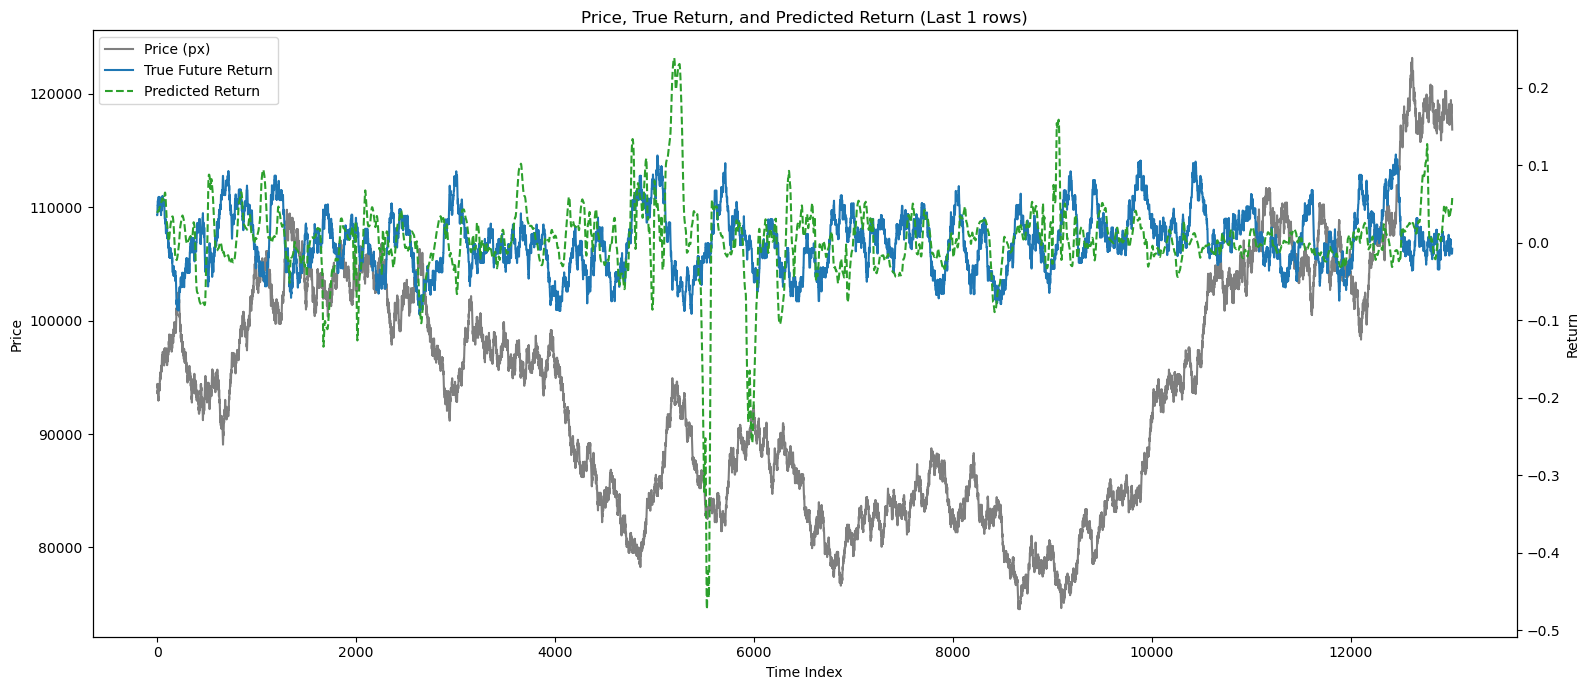

,timestamp,symbol,true_label,predicted_value,px,predicted_prob_rolling_mean,predicted_prob_rolling_mean_reverse
0,1735690858659000,BTCUSDT,0.041994,0.038302,93839.1,0.038302,0.961698
1,1735692723205000,BTCUSDT,0.035793,0.039071,94130.1,0.038687,0.961313
2,1735693111292000,BTCUSDT,0.035792,0.040013,94422.0,0.039129,0.960871
3,1735693405708000,BTCUSDT,0.041994,0.041282,94129.2,0.039667,0.960333
4,1735694635153000,BTCUSDT,0.048196,0.042329,93837.3,0.040199,0.959801
...,...,...,...,...,...,...,...
13018,1753402859983000,BTCUSDT,-0.013827,0.064866,117927.6,0.051618,0.948382
13019,1753405800429000,BTCUSDT,-0.013827,0.065723,117562.0,0.053644,0.946356
13020,1753408519355000,BTCUSDT,-0.007626,0.065899,117197.5,0.055744,0.944256
13021,1753411111053000,BTCUSDT,-0.007626,0.065435,116834.1,0.057875,0.942125


In [15]:
rolling_window_size = 10

final_predictions_df = pd.concat(all_tab_inc_test_predictions).sort_values('timestamp').reset_index(drop=True)

final_predictions_df['predicted_prob_rolling_mean'] = final_predictions_df['predicted_value'].rolling(window=rolling_window_size, min_periods=1).mean()
final_predictions_df['predicted_prob_rolling_mean_reverse'] = 1-final_predictions_df['predicted_prob_rolling_mean']

plot_last_n_rows_with_px_regression(
    y_true=final_predictions_df['true_label'],
    y_pred=final_predictions_df['predicted_prob_rolling_mean'],
    px=final_predictions_df['px'],
    n=1,
    alpha=1.5
)

final_predictions_df

In [16]:
# 计算未来收益

final_predictions_df['future_return'] = (
    final_predictions_df['px'].shift(-future_window) / final_predictions_df['px'] - 1
)


from scipy.stats import spearmanr

signal_col = 'predicted_value'
return_col = 'future_return'

ic_df = final_predictions_df[[signal_col, return_col]].dropna()
rank_ic, p_value = spearmanr(ic_df[signal_col], ic_df[return_col])

print(f"Rank IC: {rank_ic:.4f}, p-value: {p_value:.4g}")


Rank IC: 0.0831, p-value: 3.585e-21


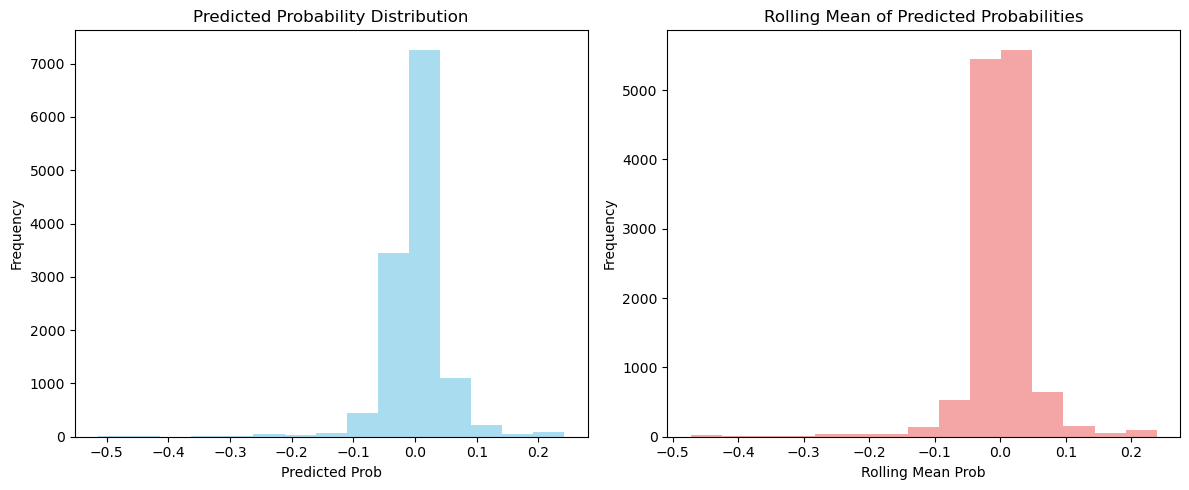

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# 原始 predict_proba 分布
plt.subplot(1, 2, 1)
plt.hist(final_predictions_df['predicted_value'][200:], bins=15, alpha=0.7, color='skyblue')
plt.title('Predicted Probability Distribution')
plt.xlabel('Predicted Prob')
plt.ylabel('Frequency')

# 滚动均值分布
plt.subplot(1, 2, 2)
plt.hist(final_predictions_df['predicted_prob_rolling_mean'][200:], bins=15, alpha=0.7, color='lightcoral')
plt.title('Rolling Mean of Predicted Probabilities')
plt.xlabel('Rolling Mean Prob')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


2025-01-01 00:20:58.659000: BUY_OPEN 0.96 @ 93904.79 (Prob: 0.0383) | Capital: 100000.00
2025-01-05 18:04:08.553000: SELL_CLOSE_LONG 0.96 @ 97492.01 | PnL: 3389.64 | Capital: 103389.64 | Reason: 
2025-01-07 15:45:55.440000: BUY_OPEN 0.95 @ 97588.26 (Prob: 0.0351) | Capital: 103389.64
2025-01-08 17:30:25.517000: SELL_CLOSE_LONG 0.95 @ 92709.76 | PnL: -4693.52 | Capital: 98696.12 | Reason: Long Stop Loss Hit
2025-01-09 04:14:22.196000: SELL_SHORT_OPEN -0.95 @ 93769.52 (Prob: -0.0368) | Capital: 98696.12
2025-01-10 16:19:48.440000: BUY_TO_COVER_SHORT 0.95 @ 93695.24 | PnL: 25.97 | Capital: 98722.09 | Reason: 
2025-01-10 16:27:30.895000: BUY_OPEN 0.95 @ 93404.54 (Prob: 0.0745) | Capital: 98722.09
2025-01-13 16:10:53.556000: SELL_CLOSE_LONG 0.95 @ 91794.80 | PnL: -1574.12 | Capital: 97147.97 | Reason: 
2025-01-15 06:53:58.402000: BUY_OPEN 0.90 @ 97175.98 (Prob: 0.0374) | Capital: 97147.97
2025-01-17 10:38:04.971000: SELL_CLOSE_LONG 0.90 @ 102362.90 | PnL: 4618.52 | Capital: 101766.50 | Reas

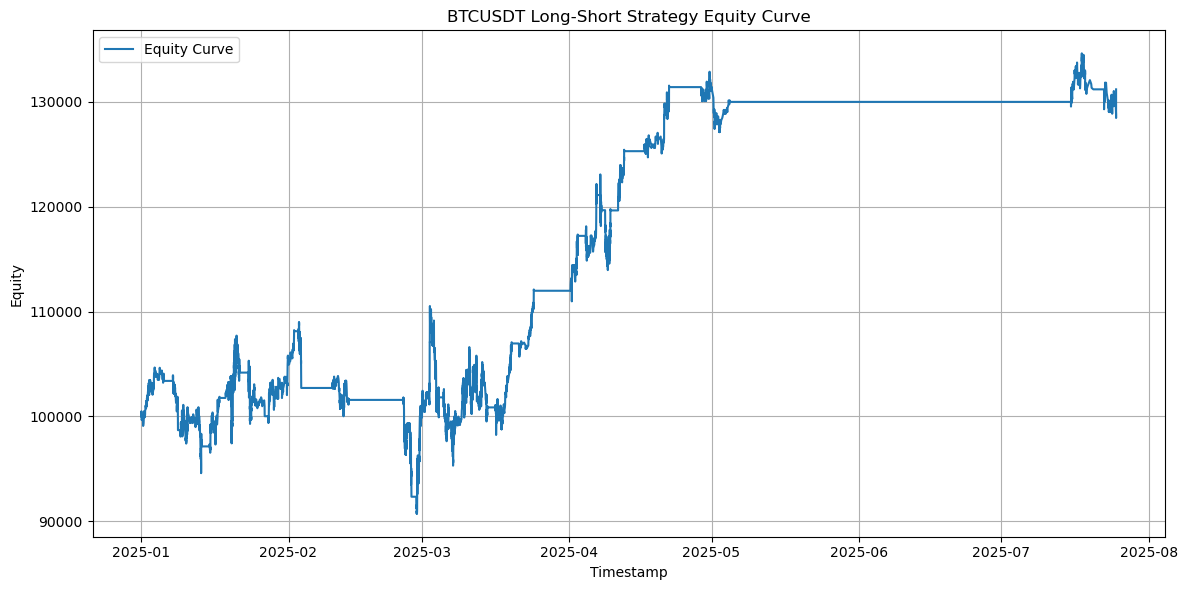

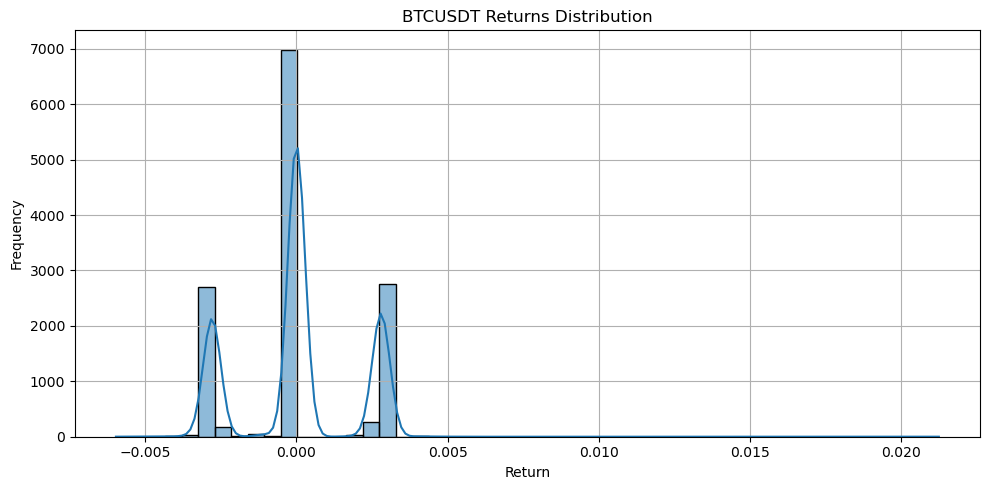

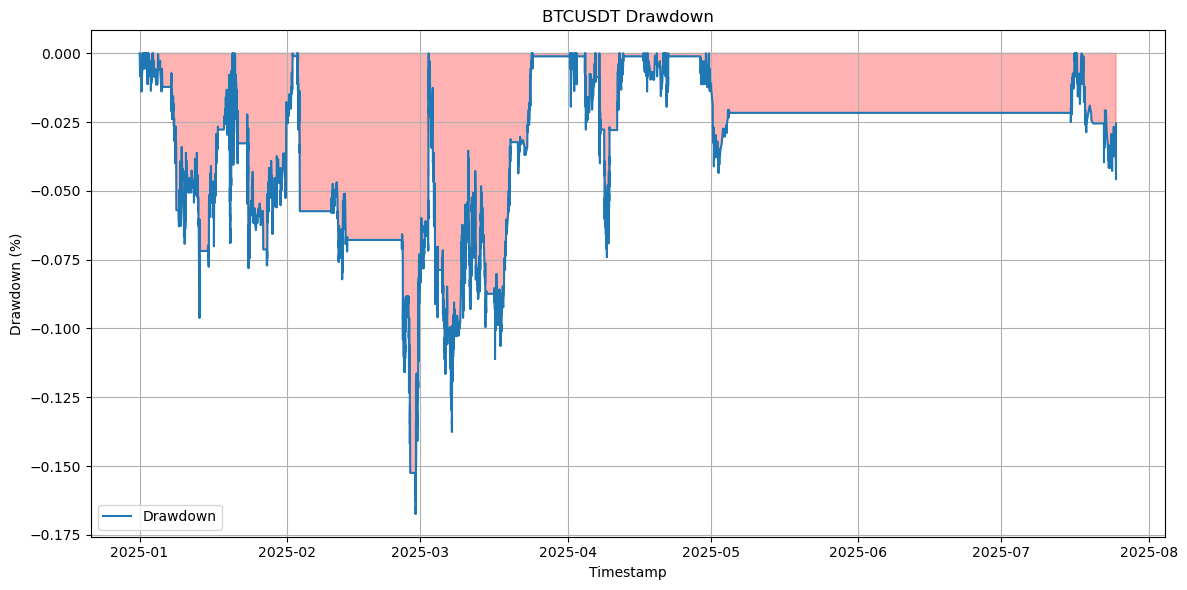

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

ma_window = int(feat_norm_rolling_mean_window)
# ma_window = 200

all_predictions_df = final_predictions_df
all_predictions_df['timestamp'] = pd.to_datetime(all_predictions_df['timestamp'], unit='us') # Assuming microseconds
all_predictions_df['ma'] = all_predictions_df['px'].rolling(window=ma_window).mean()

symbol_to_backtest = all_predictions_df['symbol'].iloc[0] # Take the first symbol for now
df = all_predictions_df[all_predictions_df['symbol'] == symbol_to_backtest].copy()
df = df.sort_values('timestamp').reset_index(drop=True)

# ===============================================
# Backtesting Parameters (Ratios for costs)
# ===============================================
initial_capital = 100000  # Initial capital
commission_ratio = 0.0005 # Commission ratio (e.0.05%)
slippage_ratio = 0.0007   # Slippage ratio (e.g., 0.02%)

trade_size_ratio = 0.9    # Percentage of current equity to allocate per trade

# Strategy Thresholds (needs optimization)
long_threshold = 0.035 # Predicted probability above this to go long (buy)
short_threshold = -0.035 # Predicted probability below this to go short (sell)

beta = 5
# Dynamic Take Profit / Stop Loss (in multiples of rolling_std/px)
long_stop_loss_multiplier = beta
long_take_profit_multiplier = beta
short_stop_loss_multiplier = beta
short_take_profit_multiplier = beta

# ===============================================
# Backtesting Main Logic (No change here from previous version)
# ===============================================

# Initialize account state
capital = initial_capital
position = 0          # Position size (positive for long, negative for short, 0 for flat)
entry_price = 0       # Entry price for current position
realized_pnl = 0      # Realized PnL from closed trades
equity_curve = [initial_capital] # Equity curve
unrealized_pnl_series = [0]

# Record trades
trades = []

step = 0

for i in range(len(df)):
    current_time = df['timestamp'].iloc[i]
    current_px = df['px'].iloc[i]
    predicted_prob = df['predicted_prob_rolling_mean'].iloc[i]
    ma = df['ma'].iloc[i]
    current_rolling_std = current_px * 0.01
    # Calculate current total equity (capital + market value of position)
    if position > 0: # Long position
        unrealized_pnl = (current_px - entry_price) * position
    elif position < 0: # Short position
        unrealized_pnl = (entry_price - current_px) * abs(position) # Profit when price falls
    else: # Flat
        unrealized_pnl = 0

    current_equity = capital + unrealized_pnl
    equity_curve.append(current_equity)
    unrealized_pnl_series.append(unrealized_pnl)

    # -----------------------------------------------
    # Strategy Execution - Long-Short
    # -----------------------------------------------

    # Scenario 1: Currently FLAT (position == 0)
    if position == 0:
        if predicted_prob >= long_threshold: # Go Long Signal
            trade_type = 'BUY_OPEN'
            trade_price = current_px * (1 + slippage_ratio)
            num_shares = (current_equity * trade_size_ratio) / (trade_price * (1 + commission_ratio))

            if num_shares > 0:
                position = num_shares
                entry_price = trade_price
                # capital -= (position * entry_price * (1 + commission_ratio))

                trades.append({
                    'timestamp': current_time, 'type': trade_type, 'price': entry_price, 'shares': position,
                    'capital_after_trade': capital, 'equity_after_trade': current_equity, 'predicted_prob': predicted_prob
                })
                print(f"{current_time}: {trade_type} {position:.2f} @ {entry_price:.2f} (Prob: {predicted_prob:.4f}) | Capital: {capital:.2f}")

        elif predicted_prob <= short_threshold: # Go Short Signal
            trade_type = 'SELL_SHORT_OPEN'
            trade_price = current_px * (1 - slippage_ratio) # Price for short is lower (sell at market)
            num_shares = (current_equity * trade_size_ratio) / (trade_price * (1 + commission_ratio))

            if num_shares > 0:
                position = -num_shares # Negative for short position
                entry_price = trade_price
                # capital -= (abs(position) * entry_price * (1 + commission_ratio))

                trades.append({
                    'timestamp': current_time, 'type': trade_type, 'price': entry_price, 'shares': position,
                    'capital_after_trade': capital, 'equity_after_trade': current_equity, 'predicted_prob': predicted_prob
                })
                print(f"{current_time}: {trade_type} {position:.2f} @ {entry_price:.2f} (Prob: {predicted_prob:.4f}) | Capital: {capital:.2f}")

    # Scenario 2: Currently LONG (position > 0)
    elif position > 0:
        sl_price = entry_price - long_stop_loss_multiplier * current_rolling_std
        tp_price = entry_price + long_take_profit_multiplier * current_rolling_std

        should_close = False
        reason = ""

        step += 1
        
        if current_px <= sl_price:
            should_close = True
            reason = "Long Stop Loss Hit"
        elif current_px >= tp_price:
            should_close = True
            reason = "Long Take Profit Hit"

        if should_close or step > future_window:
            step = 0
            trade_type = 'SELL_CLOSE_LONG'
            close_price = current_px * (1 - slippage_ratio)
            gross_pnl_on_trade = (close_price - entry_price) * position
            net_pnl_on_trade = gross_pnl_on_trade - (close_price * position * commission_ratio)

            realized_pnl += net_pnl_on_trade
            capital += net_pnl_on_trade

            trades.append({
                'timestamp': current_time, 'type': trade_type, 'price': close_price, 'shares': position,
                'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': current_equity,
                'reason': reason, 'predicted_prob': predicted_prob
            })
            print(f"{current_time}: {trade_type} {position:.2f} @ {close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f} | Reason: {reason}")
            
            position = 0
            entry_price = 0


    # Scenario 3: Currently SHORT (position < 0)
    elif position < 0:
        sl_price = entry_price + long_stop_loss_multiplier * current_rolling_std
        tp_price = entry_price - long_take_profit_multiplier * current_rolling_std

        should_close = False
        reason = ""

        step += 1

        if current_px >= sl_price:
            should_close = True
            reason = "Short Stop Loss Hit"
        elif current_px <= tp_price:
            should_close = True
            reason = "Short Take Profit Hit"

        if should_close or step > future_window:
            step = 0

            trade_type = 'BUY_TO_COVER_SHORT'
            close_price = current_px * (1 + slippage_ratio)
            gross_pnl_on_trade = (entry_price - close_price) * abs(position)
            net_pnl_on_trade = gross_pnl_on_trade - (close_price * abs(position) * commission_ratio)

            realized_pnl += net_pnl_on_trade
            capital += net_pnl_on_trade

            trades.append({
                'timestamp': current_time, 'type': trade_type, 'price': close_price, 'shares': position,
                'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': current_equity,
                'reason': reason, 'predicted_prob': predicted_prob
            })
            print(f"{current_time}: {trade_type} {abs(position):.2f} @ {close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f} | Reason: {reason}")

            position = 0
            entry_price = 0

# Final close-out at the end of backtest if any position is open
final_equity_append_time = df['timestamp'].iloc[-1] + pd.Timedelta(seconds=1)
if position != 0:
    last_px = df['px'].iloc[-1]
    if position > 0: # Close long
        final_close_price = last_px * (1 - slippage_ratio)
        gross_pnl_on_trade = (final_close_price - entry_price) * position
        net_pnl_on_trade = gross_pnl_on_trade - (final_close_price * position * commission_ratio)
        # capital += (position * final_close_price * (1 - commission_ratio))
        trades.append({
            'timestamp': final_equity_append_time, 'type': 'SELL_FINAL_LONG', 'price': final_close_price, 'shares': position,
            'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': equity_curve[-1],
            'reason': 'End of Backtest', 'predicted_prob': df['predicted_value'].iloc[-1]
        })
        # print(f"End of Backtest: SELL_FINAL_LONG {position:.2f} @ {final_close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f}")
    else: # Close short
        final_close_price = last_px * (1 + slippage_ratio)
        gross_pnl_on_trade = (entry_price - final_close_price) * abs(position)
        net_pnl_on_trade = gross_pnl_on_trade - (final_close_price * abs(position) * commission_ratio)
        # capital += (abs(position) * entry_price * (1 - commission_ratio))
        trades.append({
            'timestamp': final_equity_append_time, 'type': 'BUY_FINAL_SHORT', 'price': final_close_price, 'shares': position,
            'pnl': net_pnl_on_trade, 'capital_after_trade': capital, 'equity_after_trade': equity_curve[-1],
            'reason': 'End of Backtest', 'predicted_prob': df['predicted_value'].iloc[-1]
        })
        # print(f"End of Backtest: BUY_FINAL_SHORT {abs(position):.2f} @ {final_close_price:.2f} | PnL: {net_pnl_on_trade:.2f} | Capital: {capital:.2f}")
    realized_pnl += net_pnl_on_trade
    position = 0

# Final equity curve update
equity_curve[-1] = capital
unrealized_pnl_series[-1] = 0
# ===============================================
# Performance Metrics Calculation (KEY CHANGES HERE)
# ===============================================
equity_series = pd.Series(equity_curve, index=df['timestamp'].tolist() + [final_equity_append_time])
returns = equity_series.pct_change().dropna()
unrealized_pnl_series = pd.Series(unrealized_pnl_series, index=equity_series.index)

# Total Return
total_return = (capital - initial_capital) / initial_capital

# Annualized Return - Based on Total Duration
annualized_return = total_return # Default value if not enough data

if len(df) > 1:
    # Get the total duration of the backtest data
    total_duration = df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]
    total_duration_seconds = total_duration.total_seconds()

    if total_duration_seconds > 0:
        # Number of seconds in a year
        seconds_in_year = 365 * 24 * 60 * 60

        # Annualization factor: (seconds in a year) / (total seconds in backtest)
        annualization_factor = seconds_in_year / total_duration_seconds

        # Apply annualization
        annualized_return = (1 + total_return)**annualization_factor - 1
    else:
        print("Warning: Total backtest duration is zero or invalid, cannot annualize return.")
else:
    print("Warning: Not enough data points to calculate total duration for annualization.")


# Max Drawdown
peak = equity_series.expanding(min_periods=1).max()
drawdown = (equity_series - peak) / peak
max_drawdown = drawdown.min()

# Sharpe Ratio (assuming risk-free rate is 0)
# For volatility, we use returns.std() and annualize it with the same factor
annualized_volatility = returns.std() * np.sqrt(annualization_factor) if 'annualization_factor' in locals() and annualization_factor > 0 else returns.std()
sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan

# Win Rate for closed trades
if len(trades) > 0:
    winning_trades = sum(1 for t in trades if 'pnl' in t and t['pnl'] > 0)
    total_closed_trades = sum(1 for t in trades if 'pnl' in t)
    win_rate = winning_trades / total_closed_trades if total_closed_trades > 0 else 0
else:
    win_rate = 0


print("\n" + "="*60)
print("Backtesting Results Summary (Long-Short Strategy):")
print(f"Initial Capital: {initial_capital:.2f}")
print(f"Final Capital: {capital:.2f}")
print(f"Total Return: {total_return:.2%}")
print(f"Total Realized PnL: {realized_pnl:.2f}")
print(f"年化收益 (近似): {annualized_return:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio (Risk-Free Rate = 0): {sharpe_ratio:.2f}")
print(f"Number of Trades: {len(trades)}")
print(f"Win Rate: {win_rate:.2%}")
print("="*60)
print("ma")

# ===============================================
# Plotting
# ===============================================

# Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(equity_series.index, equity_series, label='Equity Curve')
plt.title(f'{symbol_to_backtest} Long-Short Strategy Equity Curve')
plt.xlabel('Timestamp')
plt.ylabel('Equity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Returns Distribution
if not returns.empty:
    plt.figure(figsize=(10, 5))
    sns.histplot(returns, kde=True, bins=50)
    plt.title(f'{symbol_to_backtest} Returns Distribution')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Drawdown Plot
if not drawdown.empty:
    plt.figure(figsize=(12, 6))
    plt.plot(drawdown.index, drawdown, label='Drawdown')
    plt.fill_between(drawdown.index, drawdown, 0, where=(drawdown < 0), color='red', alpha=0.3)
    plt.title(f'{symbol_to_backtest} Drawdown')
    plt.xlabel('Timestamp')
    plt.ylabel('Drawdown (%)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# plt.figure(figsize=(12, 6))
# plt.plot(unrealized_pnl_series.index, unrealized_pnl_series, label="Unrealized PnL")
# plt.axhline(0, color='gray', linestyle='--')
# plt.title(f"{symbol_to_backtest} 浮动盈亏 (Unrealized PnL)")
# plt.xlabel("Timestamp")
# plt.ylabel("Unrealized PnL")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()
